In [1]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import lmfit


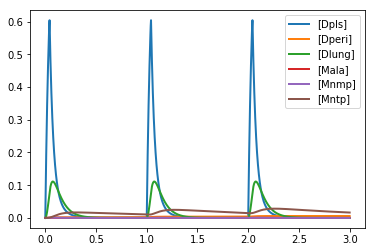

In [2]:
model_str = '''
    model dosingmodel()
    //Time is in days!
    
    //infusion
    
    -> Dpls; switch * infusion_amount / one_our // switch = (0,1) to turn on or off, infusion happens over 1h
    
    //flow from plasma 
    
    Dpls -> ; kE0 * Dpls // elimination
    
    Dpls -> Dperi ; kp * Dpls // to periphery 
    
    Dpls -> Dlung ; k0 * Dpls
    
    // flow from periphery
    
    Dperi -> Dpls ; kpp * Dpls // to plasma 
    
    // Drug reactions / flow in lung
    
    Dlung -> Dpls ; k0 * Dlung
    
    Dlung -> Mala ; k12 * Dlung
    
    Dlung -> ; kE1 * Dlung
    
    // Mala reactions
    
    Mala -> Mnmp ; k23 * Mala
    
    Mala -> ; kE2 * Mala
    
    //Mnmp reactions
    
    Mnmp -> Mntp ; k34 * Mnmp
    Mnmp ->  ; kE3 * Mnmp
    
    // Mntp reaction
    
    Mntp -> ; kE4 * Mntp
    
    //parameters
    // initial conditions 
    
    //utils
    switch = 0 //turns infusion on/off
    curr_infu_start = 0 // tracks when current infusion started
    
    // rates
    
    kp = 0.41195
    
    kpp = 0.36502

    k0 = 6.3335
    
    k12 = 1.2248
    
    k23 = 372.61
    
    k34 = 181.64

    kE0 = 20.253
    
    kE1 = 7.81
    
    kE2 = 6.0801
    
    kE3 = 0.97259
    
    kE4 = 0.83115

    //constants
    infusion_amount = 1
    
    dose_interval = 1
    
    dose_end = 9999
    
    one_our = 1/24 
    
    first_dose = 0
    
    // events
    
    E1: at (time - first_dose > 0): switch = 1, curr_infu_start = time ; // starts the first infusion
    E2: at ( (time-first_dose > dose_interval) && (time < dose_end) && sin((((time-first_dose)/dose_interval))*2*pi)>0): switch = 1, curr_infu_start = time; // starts the subsequent infusions
    E3: at (time - (one_our + curr_infu_start) > 0): switch = 0 ; // turns infusion off
    
    end
'''


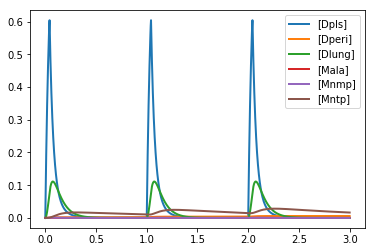

In [3]:

r = te.loada(model_str)
r.simulate(0, 3, 1000)
r.plot()

In [10]:
compartments_model_str = '''
    model dosingmodel()
    //Time is in days!
    
    // compartments
    
    compartment L; //lungs
    L = 6.0 // volume of L
    
    
    compartment P; // plasma
    P = 3.0
    
    compartment B; // rest of body
    B = 90.0
    
    // species
    
    species Dpls, Dperi, Dlung, Mala, Mnmp, Mntp;
    
    Dpls in P;
    
    Dperi in B;
    
    Dlung in L;
    
    Mala in L;
    
    Mnmp in L;
    
    Mntp in L;
        
    //infusion
    
    -> Dpls; switch * infusion_amount / one_our // switch = (0,1) to turn on or off, infusion happens over 1h
    
    //flow from plasma 
    
    Dpls -> ; kE0 * Dpls // elimination
    
    Dpls -> Dperi ; kp * Dpls // to periphery 
    
    Dpls -> Dlung ; k0 * Dpls
    
    // flow from periphery
    
    Dperi -> Dpls ; kpp * Dpls // to plasma 
    
    // Drug reactions / flow in lung
    
    Dlung -> Dpls ; k0 * Dlung
    
    Dlung -> Mala ; k12 * Dlung
    
    Dlung -> ; kE1 * Dlung
    
    // Mala reactions
    
    Mala -> Mnmp ; k23 * Mala
    
    Mala -> ; kE2 * Mala
    
    //Mnmp reactions
    
    Mnmp -> Mntp ; k34 * Mnmp
    Mnmp ->  ; kE3 * Mnmp
    
    // Mntp reaction
    
    Mntp -> ; kE4 * Mntp
    
    
    //parameters
    // initial conditions 
    
    //utils
    switch = 0 //turns infusion on/off
    curr_infu_start = 0 // tracks when current infusion started
    
    // rates
    
    kp = 1
    
    kpp = 1

    k0 = 6.3335
    
    k12 = 1.2248
    
    k23 = 372.61
    
    k34 = 181.64

    kE0 = 20.253
    
    kE1 = 7.81
    
    kE2 = 6.0801
    
    kE3 = 0.97259
    
    kE4 = 0.83115

    //constants
    infusion_amount = 1
    
    dose_interval = 1
    
    dose_end = 9999
    
    one_our = 1/24 
    
    first_dose = 0
    
    // events
    
    
    end
'''


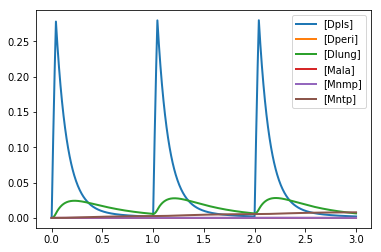

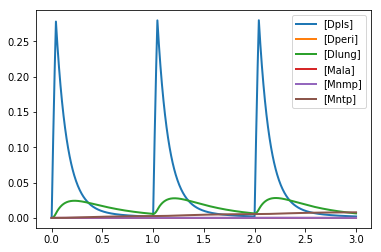

In [12]:

nr = te.loada(compartments_model_str)
nr.simulate(0, 3, 1000)
r.plot()
nr.plot()